# Initial Preparation

## Import Packages

In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from pandas_profiling import ProfileReport

## Import Data

In [43]:
url = "../data/raw/twitter_training.csv"

df = pd.read_csv(url, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

In [44]:
len(df)

74682

## Subset Data

In [4]:
df = df.sample(frac=0.01)

## Visualise and Explore Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 50933 to 14448
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       747 non-null    int64 
 1   Entity         747 non-null    object
 2   Sentiment      747 non-null    object
 3   Tweet_Content  743 non-null    object
dtypes: int64(1), object(3)
memory usage: 29.2+ KB


In [6]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
50933,6341,FIFA,Irrelevant,"If have have raged so much at a game, you are ..."
62202,5063,GrandTheftAuto(GTA),Negative,i ain’t playing GTA no more that shit done 4.
73229,8944,Nvidia,Negative,Nvidia. its Nvidia that constantly telling me ...
38928,5482,Hearthstone,Neutral,PACKS i hatever beats lunch and I NEED TO WIN ...
36164,8207,Microsoft,Negative,Thanks for mentioning! rafi: LucidPointeO365 I...


In [7]:
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

## Clean Data

<BarContainer object of 4 artists>

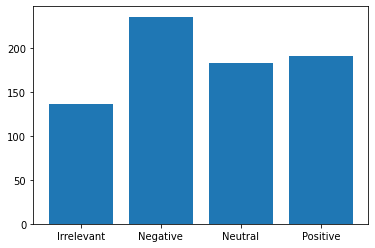

In [8]:
# To see what's going on before dropping datapoints
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

In [9]:
df = df.dropna()

# Further Exploration

In [10]:
df["Sentiment"].unique()

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [11]:
print(df["Entity"].unique())
print(len(df["Entity"].unique()))

onehot = pd.get_dummies(df["Entity"])

df = df.join(onehot)

df.head()

['FIFA' 'GrandTheftAuto(GTA)' 'Nvidia' 'Hearthstone' 'Microsoft' 'Dota2'
 'CS-GO' 'Facebook' 'Overwatch' 'PlayerUnknownsBattlegrounds(PUBG)'
 'CallOfDuty' 'Fortnite' 'TomClancysGhostRecon' 'Cyberpunk2077' 'Verizon'
 'TomClancysRainbowSix' 'johnson&johnson' 'AssassinsCreed' 'Google'
 'CallOfDutyBlackopsColdWar' 'RedDeadRedemption(RDR)' 'MaddenNFL' 'NBA2K'
 'ApexLegends' 'Battlefield' 'Borderlands' 'HomeDepot' 'WorldOfCraft'
 'LeagueOfLegends' 'Amazon' 'Xbox(Xseries)' 'PlayStation5(PS5)']
32


,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
50933,6341,FIFA,Irrelevant,"If have have raged so much at a game, you are ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62202,5063,GrandTheftAuto(GTA),Negative,i ain’t playing GTA no more that shit done 4.,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73229,8944,Nvidia,Negative,Nvidia. its Nvidia that constantly telling me ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38928,5482,Hearthstone,Neutral,PACKS i hatever beats lunch and I NEED TO WIN ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36164,8207,Microsoft,Negative,Thanks for mentioning! rafi: LucidPointeO365 I...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 4 artists>

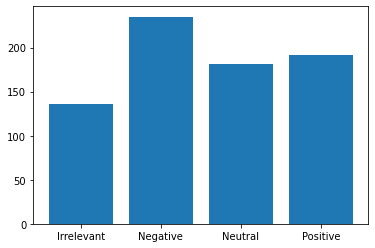

In [12]:
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

## Adding Features with TextBlob Pre-trained NLP

## Stop Word Removal and Lemmatization With NLTK

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


def remove_stopwords(ls):
    #Removes stop words and lemmatises
    ls = [lemmatiser.lemmatize(word) for word in ls if word not in (stopwords.words()) and (word.isalpha())]
    
    ls = " ".join(ls)
    return ls

df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)

lemmatiser = WordNetLemmatizer()

df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cameron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cameron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
list(df["Tweet_Content_Split"])[0]

'If raged much game literal child'

## Tokenisation

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [16]:
tokeniser = Tokenizer(num_words=500, lower=True)

tokeniser.fit_on_texts(df["Tweet_Content_Split"])

In [17]:
tweet_tokens = tokeniser.texts_to_matrix(list(df["Tweet_Content_Split"]))

## Final Preparation of Data for Model

In [18]:
y = df["Sentiment"]

labels = set(df["Sentiment"])

class_to_index = {"Neutral":0, "Irrelevant":0, "Negative":1, "Positive": 2}

index_to_class = dict((v,k) for k, v in class_to_index.items())

names_to_ids = lambda y: np.array([class_to_index.get(x) for x in df["Sentiment"]])

ids_to_names = lambda y: np.array([index_to_class.get(x) for x in y])

train_labels = names_to_ids(y)

In [19]:
df["Labels"] = train_labels

In [20]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Tweet_Content_Split,Labels
50933,6341,FIFA,Irrelevant,"If have have raged so much at a game, you are ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,If raged much game literal child,0
62202,5063,GrandTheftAuto(GTA),Negative,i ain’t playing GTA no more that shit done 4.,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,playing GTA shit done,1
73229,8944,Nvidia,Negative,Nvidia. its Nvidia that constantly telling me ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Nvidia Nvidia constantly telling strong,1
38928,5482,Hearthstone,Neutral,PACKS i hatever beats lunch and I NEED TO WIN ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,PACKS hatever beat lunch I NEED TO WIN HEARTHS...,0
36164,8207,Microsoft,Negative,Thanks for mentioning! rafi: LucidPointeO365 I...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Thanks mentioning rafi I stand new,1


## Test/Train Split of Data

In [21]:
y = df["Labels"]

df2 = df.drop(["Sentiment", "Entity", "Tweet_ID", "Tweet_Content", "Tweet_Content_Split", "Labels"], axis=1)

In [22]:
array_3 = df2.to_numpy()

full_array = np.concatenate([array_3, tweet_tokens], axis=1)

In [23]:
full_df = pd.DataFrame(full_array)

full_df.shape

(743, 532)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(full_df, y, test_size=0.2, random_state=1)

## Build Neural Network with Keras

In [25]:
#Test initial network
import tensorflow as tf

model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(1000,16,input_length=532),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='relu')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

## Testing Methods

### Neural Network with Keras

In [26]:
h = model.fit(
     X_train, y_train,
     validation_data=(X_test, y_test),
     epochs=30,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)]
)

Epoch 1/30
19/19 [==============================] - 15s 528ms/step - loss: 6.5245 - accuracy: 0.3081 - val_loss: 5.7341 - val_accuracy: 0.3423
Epoch 2/30
19/19 [==============================] - 9s 494ms/step - loss: 6.6998 - accuracy: 0.3098 - val_loss: 5.7111 - val_accuracy: 0.3423
Epoch 3/30
19/19 [==============================] - 9s 491ms/step - loss: 6.6191 - accuracy: 0.3098 - val_loss: 5.6087 - val_accuracy: 0.3423
Epoch 4/30
19/19 [==============================] - 9s 456ms/step - loss: 6.4467 - accuracy: 0.3098 - val_loss: 5.3934 - val_accuracy: 0.3423
Epoch 5/30
19/19 [==============================] - 10s 543ms/step - loss: 4.1322 - accuracy: 0.3636 - val_loss: 1.7061 - val_accuracy: 0.3691
Epoch 6/30
19/19 [==============================] - 8s 434ms/step - loss: 1.4007 - accuracy: 0.4411 - val_loss: 1.3863 - val_accuracy: 0.3691
Epoch 7/30
19/19 [==============================] - 8s 419ms/step - loss: 1.3863 - accuracy: 0.4411 - val_loss: 1.3863 - val_accuracy: 0.3691
Epoc

In [27]:
y_pred = model.predict(X_train)
preds = [round(sum(y_pred[i,:])) for i in range(len(y_pred))]

y_pred_labels = ids_to_names(preds)

In [28]:
set(y_pred_labels)

{'Irrelevant'}

# Final

## Training With Full Dataset

In [29]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(1000,16,input_length=532),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

In [30]:
h = model.fit(
     full_df, y,
     epochs=20,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)]
)

Epoch 1/20
24/24 [==============================] - 15s 428ms/step - loss: 1.2767 - accuracy: 0.3526
Epoch 2/20
24/24 [==============================] - 12s 512ms/step - loss: 1.0981 - accuracy: 0.4266
Epoch 3/20
24/24 [==============================] - 11s 451ms/step - loss: 1.0950 - accuracy: 0.4266
Epoch 4/20
24/24 [==============================] - 11s 453ms/step - loss: 1.0830 - accuracy: 0.4266
Epoch 5/20
24/24 [==============================] - 10s 404ms/step - loss: 1.0810 - accuracy: 0.4266
Epoch 6/20
24/24 [==============================] - 11s 446ms/step - loss: 1.0807 - accuracy: 0.4266


## Generating Predictions

## Download and Transform Test Data

In [31]:
path = "../data/raw/twitter_validation.csv"

test_df = pd.read_csv(url, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

test_df = test_df.dropna()

In [32]:
onehot = pd.get_dummies(test_df["Entity"])

test_df = test_df.join(onehot)

test_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4433,Google,Neutral,Now the President is slapping Americans in the...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test_df["Tweet_Content_Split"] = test_df["Tweet_Content"].apply(word_tokenize)
test_df["Tweet_Content_Split"] = test_df["Tweet_Content_Split"].apply(remove_stopwords)

In [34]:
test_tweet_tokens = tokeniser.texts_to_matrix(list(test_df["Tweet_Content_Split"]))

In [35]:
y = test_df["Sentiment"]

names_to_ids = lambda y: np.array([class_to_index.get(x) for x in test_df["Sentiment"]])

test_labels = names_to_ids(y)

In [36]:
test_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Tweet_Content_Split
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,I mentioned Facebook I struggling motivation g...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BBC News Amazon bos Jeff Bezos reject claim co...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Microsoft Why I pay WORD function poorly Samsu...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,CSGO matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Now President slapping Americans really commit...


In [37]:
y = test_labels

test_df2 = test_df.drop(["Sentiment", "Entity", "Tweet_ID", "Tweet_Content", "Tweet_Content_Split"], axis=1)

In [38]:
model.evaluate(test_df2, y)

32/32 [==============================] - 1s 8ms/step - loss: 1.0730 - accuracy: 0.4570


[1.0729602575302124, 0.4569999873638153]

## Generate Predictions

In [39]:
y_pred = model.predict(X_test)
preds = [round(sum(y_pred[i,:])) for i in range(len(y_pred))]

y_pred_labels = ids_to_names(preds)

In [42]:
set(y_pred_labels)

{'Negative'}